# p14: Solve nonlinear BVP 

$$
u_{xx} = \exp(u), \qquad u(-1)=u(1)=0
$$

by Picard iteration. Set $v_{old} = 0$ and solve

$$
\tilde{D}_N^2 v_{new} = \exp(v_{old})
$$

until convergence.

In [7]:
%config InlineBackend.figure_format='svg'
from numpy import dot,exp,zeros,linspace,inf
from numpy.linalg import norm
from chebPy import cheb
from scipy.linalg import solve
from scipy.interpolate import barycentric_interpolate
from matplotlib.pyplot import title,plot,xlabel,ylabel,legend

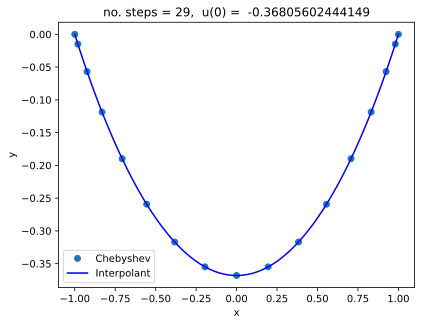

In [8]:
N = 16 # N must be even
D,x = cheb(N)
D2 = dot(D,D)
D2 = D2[1:N,1:N]

uold = zeros(N-1)
err = zeros(N-1)
change, it = 1.0, 0

while change > 1.0e-15:
    unew = solve(D2,exp(uold))
    change = norm(unew-uold, inf)
    uold = unew
    it += 1

# Add bounday values to u vector
u = zeros(N+1); u[1:N] = unew

# Chebyshev interpolation to finer grid for plotting
xx = linspace(-1.0,1.0,201)
uu = barycentric_interpolate(x,u,xx)

title('no. steps = %d,  u(0) = %18.14f' %(it,u[N//2]) )
plot(x,u,'o',label='Chebyshev')
plot(xx,uu,'b',label='Interpolant')
xlabel('x'), ylabel('y'), legend();